# Unsupervised Learning

## By Akshan Sameullah

*Unsupervised Learning* is a machine learning branch that doesn't actually use labels to differentiate data. Instead, it looks for patterns in data to create "clusters" after reducing dimensions.

In [14]:
from sklearn import datasets
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import umap

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)
iris_df = load_iris()
x_axis = iris_df.data[:, 0]
y_axis = iris_df.data[:, 2]
X_train, X_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size=0.2)

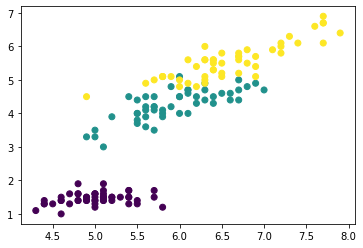

In [3]:
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

## K-Means Clustering

K-Means Clustering is perhaps one of the most simple unsupervised learning techniques. It involves creating centroids and placing them at random locations. Then, every data point is then given a label based on the centroid that it is closest to. The centroids are then moved to the position that resembles the average of the points with that centroids label. After that, data points are assigned an updated label based on the closest newly moved centroid. This process of updating the centroid locations and updating the labels for the data points repeats until the clusters are distinguished.

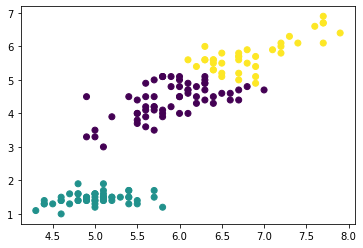

In [4]:
K_Means_model = KMeans(n_clusters=3)
K_Means_model.fit(iris_df.data)
all_predictions = K_Means_model.predict(iris_df.data)
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

## Hierarchical Clustering

In Hierarchical Clustering, all the data points are first grouped in one large cluster. This is then split up into two clusters, and then more clusters. This process of splitting is done recursively.

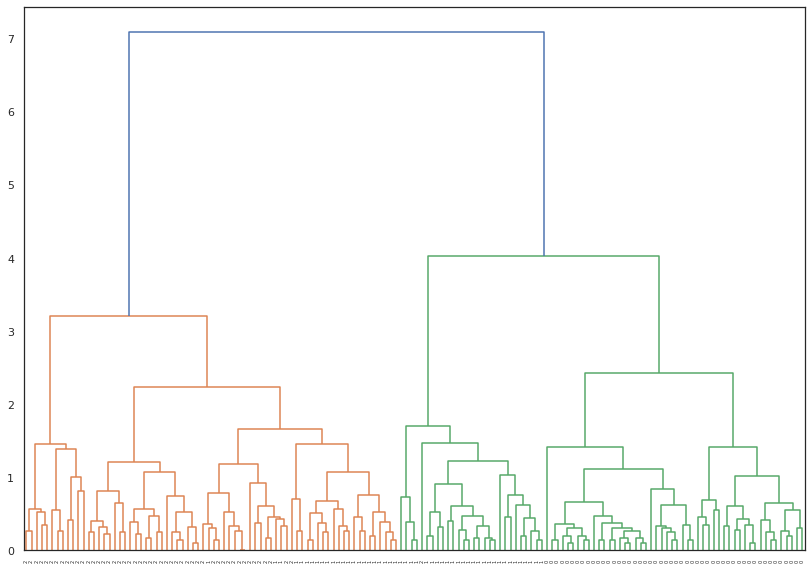

In [19]:
mergings = linkage(iris_df.data, method='complete')
ddgm = dendrogram(mergings, labels=list(iris_df.target))
plt.show()

## t-SNE

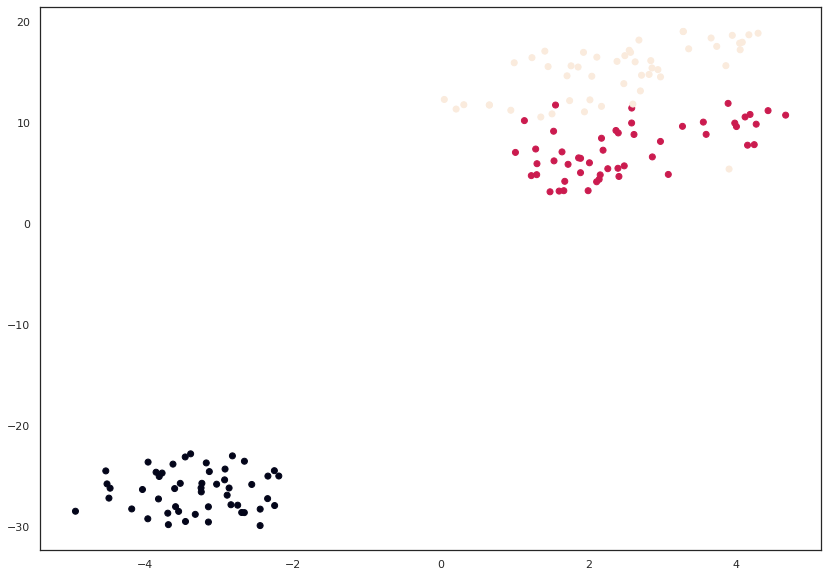

In [20]:
tSNEmodel = TSNE(learning_rate=100)
transformed = tSNEmodel.fit_transform(iris_df.data)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

## DBScan

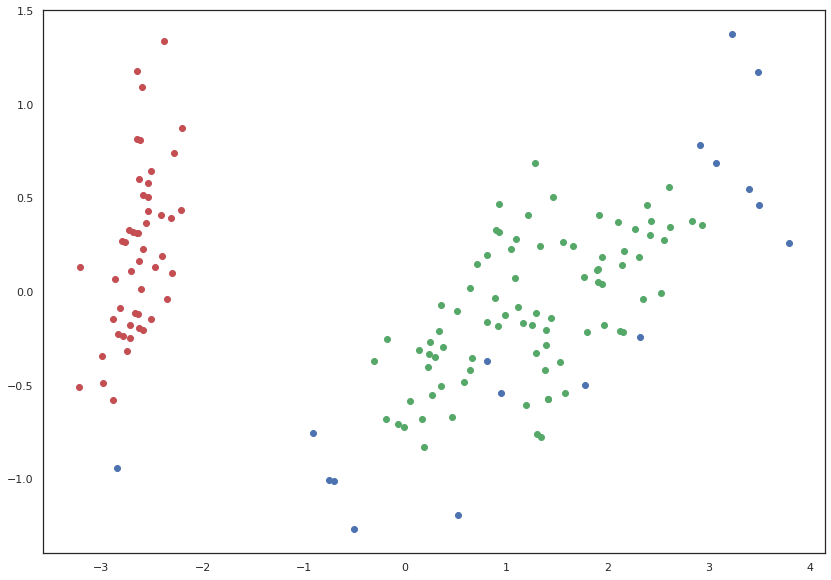

In [21]:
DBScanmodel = DBSCAN()
DBScanmodel.fit(iris_df.data)
pca = PCA(n_components=2).fit(iris_df.data)
pca_2d = pca.transform(iris_df.data)
for i in range(0, pca_2d.shape[0]):
    if DBScanmodel.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='o')
    elif DBScanmodel.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif DBScanmodel.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='o')
plt.show()

## UMAP

In [22]:
!pip install umap-learn

Shape (150, 2)


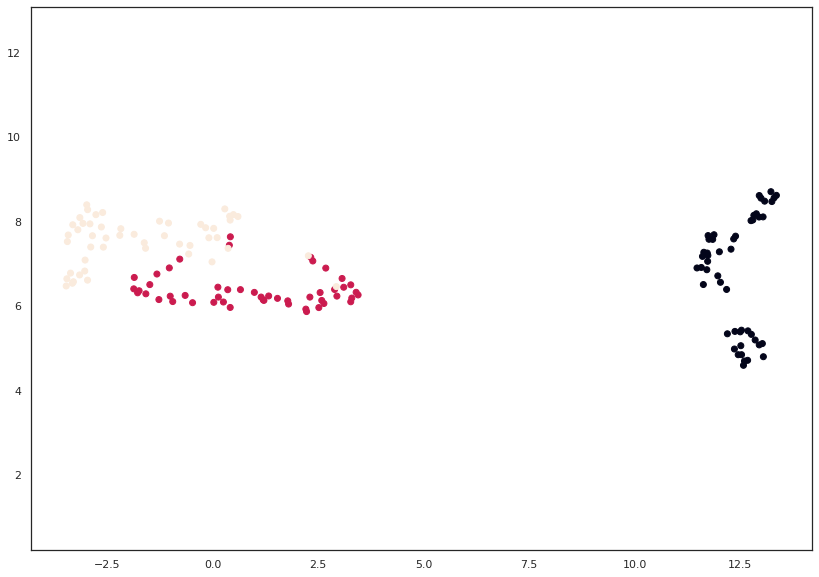

In [25]:
reducer = umap.UMAP()
data = StandardScaler().fit_transform(iris_df.data)
embedding = reducer.fit_transform(data)
print("Shape", embedding.shape)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c= iris_df.target)
plt.gca().set_aspect('equal', 'datalim')